<a href="https://colab.research.google.com/github/weathon/kNN_Research/blob/main/Simple_2D_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import autograd.numpy as np
from autograd import grad

In [2]:
def f(x):
  return (x-50)**2

In [3]:
# generate data
import random
X = []
Y = []
label = []
for i in range(600):
  x = np.random.uniform()*100
  y = np.random.uniform()*100
  X.append([x,y])
  if y>f(x):
    Y.append(1)
  else:
    Y.append(0)


In [4]:
import sklearn.metrics
X = np.array(X)
Y = np.array(Y)
indexs = np.arange(len(X))

def train_step(A, k):
  pred = []
  real = []
  global X,Y, accuracy

  r = int(len(X)*0.5)
  #kunoukoukeduziheisright?kunduzikun zhe gee shi qu 0.8 meiciyifong 0.1?xkou hmiande 0.2 kunkouke zheyag gaicheng 0.9 zhihou yiranconverge 
  npX = np.array(X[:r])
  npY = np.array(Y[:r])
  X_val = np.array(X[r:])
  Y_val = np.array(Y[r:])

  error = 0
  # TruePositives = 0
  # FalseNegatives = 0
  # FalsePositives = 0
  # TrueNegatives = 0
  MSE = 0.0

  for sample in range(len(X)-r): 
    distance = np.sum(A*(npX - X_val[sample])**2,axis=1) 
    sum0 = 0
    sum1 = 0
    mins = np.argsort(distance)[:k]
    sum0 += np.sum(1/(distance[mins]+1))
    sum1 += np.sum(1/(distance[mins]+1) * (npY[mins]))
    pred.append(1 if sum1/sum0>0.5 else 0)
    real.append(Y_val[sample]) #npY
    MSE += (sum1/sum0-Y_val[sample])**2
  # print(real,pred)
  F2 = sklearn.metrics.fbeta_score(real, pred, beta=2)
  return  MSE/(len(X)-r), F2


In [5]:
def val(A, k):
  pred = []
  real = []
  global X,Y, accuracy

  npX = np.array(X[:])
  npY = np.array(Y[:])
  X_val = []
  Y_val = []
  
  for i in range(50):
    x = np.random.uniform()*100
    y = np.random.uniform()*100
    X_val.append([x,y])
    if y>f(x):
      Y_val.append(1)
    else:
      Y_val.append(0)

  error = 0
  MSE = 0.0

  for sample in range(len(X)-r): 
    distance = np.sum(A*(npX - X_val[sample])**2,axis=1) 
    sum0 = 0
    sum1 = 0
    mins = np.argsort(distance)[:k]
    sum0 += np.sum(1/(distance[mins]+1))
    sum1 += np.sum(1/(distance[mins]+1) * (npY[mins]))
    pred.append(1 if sum1/sum0>0.5 else 0)
    real.append(Y_val[sample]) #npY
    MSE += (sum1/sum0-Y_val[sample])**2
  # print(real,pred)
  F2 = sklearn.metrics.fbeta_score(real, pred, beta=2)
  return  MSE/(len(X)-r), F2


In [6]:
def d(A):
  return train_step(abs(A),30)[0]
train_grad = grad(d)

In [7]:
def X_shuffle(X):
  return np.append(X[len(X)//10:,:],X[:len(X)//10,:],axis=0)

def shuffle(X):
  return np.append(X[len(X)//10:],X[:len(X)//10])

In [8]:
import matplotlib.pyplot as plt
#kuneinkunzhameklunattxkouyangzang
plt.scatter(X[:,0],X[:,1],c=Y) #xkouruankun nanshou chaojisuan xkoutttttkun ruanhuxi yanyang ttxkouhuxizhangkun huang tanxaoixoaikmaikandaoskou xkoukunyachiruantt zhege tumeicuo suoruanruanurunttkunsuoyizhendeshishukjucuolejiumaijianchaxkouxkouruanku
#xkouttxkouxueyakunnashouzhang weism wo xianzai shuffle haikeyieng jishishi random shuffleyekeyi nashismcuolexkou runhaishifenxi xkouxkou ttfaruankuneix huxi duzi nashou zang kun zheyiqieeixnkun znaghuangfaruanhuxi chajixiaiayangdaduhaishimeiulunanashismshidhouhuiuluan

NameError: ignored

In [ ]:
np.random.shuffle(indexs) 
X = X[indexs]
Y = Y[indexs] 
#zhinnongyigejiuhuilunandiao tt xueyakun zhiqiqnzenmehuishiweism shuffeyicizhihoujiubuxlekun yijinglinguoyihuile

In [ ]:
indexs = np.arange(len(X))


In [ ]:
#mmenshenghuangxkouniaokun ttnanshoudeiziizo walmartkunniaoduzi ttnanshouhuangttduzixueyakun zhsouzan

In [ ]:
# ruanzhendexkou buxipaitupianshidui de xueyaxueyattttindexstxueyakun numpybushuruan

In [ ]:
Y#yefensankaile?
np.random.shuffle(indexs)
X_old = X[indexs]
Y_old = Y[indexs] 

In [ ]:
alpha = 0.1 # if it is 1, it can learn fast at the begining but the loss will increase after step over the min
A = np.array([1.0,1.0])
losses = []
F1List = []
for epoches in range(300): 
  losssum = 0
  f1sum = 0
  for batch in range(10):
    slope = train_grad(A)
    A-=slope*alpha
    loss, F1 = train_step(A,30) 
    losssum+=loss
    f1sum += F1
    indexs=shuffle(indexs)  
    X = X_old[indexs]
    Y = Y_old[indexs] 
  losses.append(losssum/10)
  F1List.append(f1sum/10)
  print(f1list[-1])
  print(losssum)


In [ ]:
for i in range(100):
      indexs=shuffle(indexs)  
      X = X_old[indexs]
      Y = Y_old[indexs] 
      print(X[:5])

In [ ]:
# xtiaokunkouke zhaodaole ttyangxkoukun 
#  meisyici padadaun meicyici  huxi bitiyoudaoshoushang meiyi ci doushizaizhshangmiande xiugai suoyi
#  xianzaigailehaishikeyimanmanxiajiangxueyakuneixn 
#  houmianyidaoqianmian 
# 9 1 2 3 4 5 6 7 8
# 8 9 1 2 3 4 5 6 7 

In [ ]:
np.random.shuffle(indexs) #aaaaakunkunkunkouke gaomingbao le zhegeshibufanhui de womendeshifanhuide fadoufaruankun koke suoyiwomendeqishimeigenggaiyoushizhegewentiquanhsnegruan

#ttttxueyakunttdanshikaishishuffleyiciyousmwentis

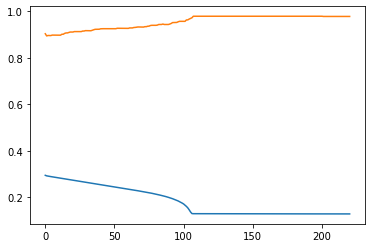

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)#xkouexyeshixiajianngde shuffle but why it effects
plt.plot(np.average(np.array(f1list[:4420]).reshape(-1, 20), axis=1))

In [ ]:
f1list[-1]

0.9862385321100916

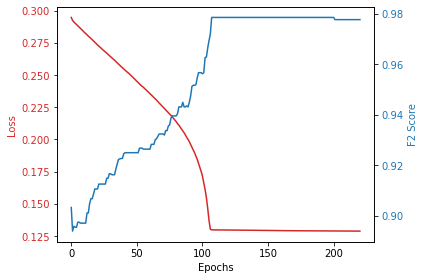

In [ ]:
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()
# fig.suptitle("Result On Simple 2D Data\n")
color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=color)
ax1.plot(losses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('F2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(np.average(np.array(f1list[:4420]).reshape(-1, 20), axis=1) , color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [ ]:
np.average(np.array(f1list[:4420]).reshape(-1, 20), axis=1) 

In [ ]:
A

array([1.59977223, 0.01755944])